In [19]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz --user
!pip3 install imblearn --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user

In [20]:
import os
import numpy as np
import pandas as pd

In [21]:
df= pd.read_csv(r'C:\Users\zdehg\Downloads\archive\DASS_data_21.02.19\data.csv',  error_bad_lines=False, warn_bad_lines=False, sep=r'\t' )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
df.drop(['Q1I', 'Q1E', 'Q2I', 'Q2E','Q3I', 'Q3E','Q4I', 'Q4E', 'Q5I', 'Q5E','Q6I', 'Q6E','Q7I', 'Q7E', 'Q8I', 'Q8E','Q9I', 'Q9E','Q10I', 'Q10E', 'Q11I', 'Q11E','Q12I', 'Q12E','Q13I', 'Q13E', 'Q14I', 'Q14E','Q15I', 'Q15E','Q16I', 'Q16E','Q17I', 'Q17E', 'Q18I', 'Q18E','Q19I', 'Q19E', 'Q20I', 'Q20E', 'Q21I', 'Q21E','Q22I', 'Q22E','Q23I', 'Q23E', 'Q24I', 'Q24E','Q25I', 'Q25E','Q26I', 'Q26E','Q27I', 'Q27E', 'Q28I', 'Q28E','Q29I', 'Q29E', 'Q30I', 'Q30E', 'Q31I', 'Q31E','Q32I', 'Q32E','Q33I', 'Q33E', 'Q34I', 'Q34E','Q35I', 'Q35E','Q36I', 'Q36E','Q37I', 'Q37E', 'Q38I', 'Q38E','Q39I', 'Q39E','Q40I', 'Q40E', 'Q41I', 'Q41E','Q42I', 'Q42E', 'source', 'introelapse', 'testelapse', 'surveyelapse'] , axis=1)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,...,1,1,1,12,1,10,2,1,2,None
1,4,1,2,3,4,4,3,4,3,2,...,2,1,2,7,0,70,2,1,4,None
2,3,1,4,1,4,3,1,3,2,4,...,2,1,1,4,3,60,1,1,3,None
3,2,3,2,1,3,3,4,2,3,3,...,2,1,2,4,5,70,2,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,2,1,1,2,4,60,2,1,2,None
39771,3,4,3,4,3,4,4,4,3,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,2,1,1,1,1,1,2,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,1,2,2,3,3,3,4,3,1,...,2,1,1,6,1,60,1,1,2,History


In [23]:
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}

DASS_bins = {'Depression': [(0, 10), (10, 14), (14, 21), (21, 28)],
             'Anxiety': [(0, 8), (8, 10), (10, 15), (15, 20)],
             'Stress': [(0, 15), (15, 19), (19, 26), (26, 34)]}
             

for name, keys in DASS_keys.items():
    # Subtract one to match definition of DASS score in source
    df[name] = (df.filter(regex='Q(%s)A' % '|'.join(map(str, keys))) - 1).sum(axis=1)
    
    bins = DASS_bins[name]
    bins.append( (DASS_bins[name][-1][-1], df[name].max() + 1) )
    bins = pd.IntervalIndex.from_tuples(bins, closed='left')
    df[name + '_cat'] = np.arange(len(bins))[pd.cut(df[name], bins=bins).cat.codes]
    
dass = df[DASS_keys.keys()]
dass_cat = df[[k + '_cat' for k in DASS_keys.keys()]]

In [24]:
# Add personality types to data
personality_types = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness']

# Invert some entries
tipi = df.filter(regex='TIPI\d+').copy()
tipi_inv = tipi.filter(regex='TIPI(2|4|6|8|10)').apply(lambda d: 7 - d)
tipi[tipi.columns.intersection(tipi_inv.columns)] = tipi_inv

# Calculate scores
for idx, pt in enumerate( personality_types ):
    df[pt] = tipi[['TIPI{}'.format(idx + 1), 'TIPI{}'.format(6 + idx)]].mean(axis=1)

personalities = df[personality_types]
personalities[['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness']].describe()

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
count,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.967278,4.040377,3.730660,2.738290,4.101634
std,1.555143,1.229776,1.491769,1.527743,1.335035
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,3.500000,2.500000,1.500000,3.500000
50%,3.000000,4.000000,3.500000,2.500000,4.000000
75%,4.000000,5.000000,5.000000,3.500000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000


In [25]:
import matplotlib.pyplot as plt

(array([[4318., 3594., 3728., 4101., 3980., 4622., 3657., 3555., 3419.,
         4801.],
        [5602., 5523., 5625., 5378., 4652., 5111., 3070., 2259., 1480.,
         1075.],
        [2238., 3037., 4208., 4756., 4897., 6315., 4655., 3920., 3041.,
         2708.]]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <a list of 3 BarContainer objects>)

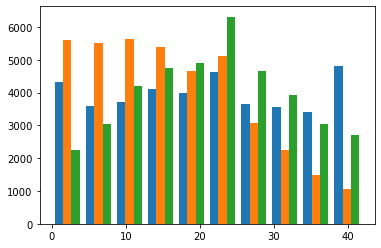

In [26]:
plt.hist(dass)
#It can be sen that this class variable is not imbalanced toward a certain result

Text(0.5, 1.0, 'dass boxplot')

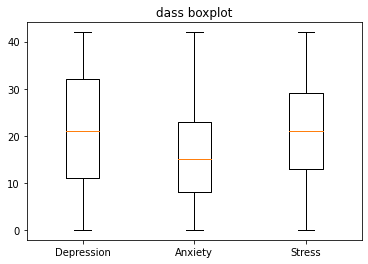

In [27]:
fig, axs = plt.subplots()
axs.boxplot(dass, labels = ['Depression', 'Anxiety','Stress'], )
axs.set_title('dass boxplot')

Text(0.5, 1.0, 'Personalities boxplot')

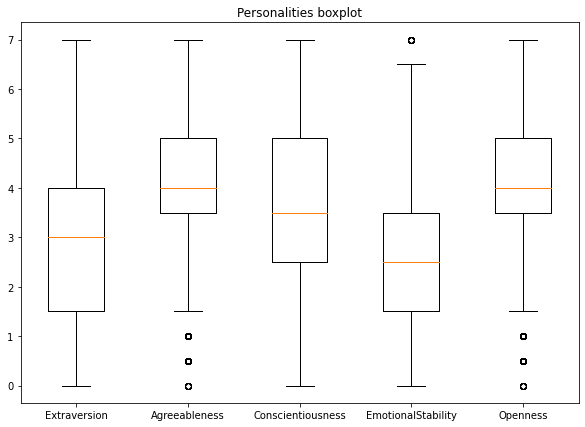

In [28]:
fig = plt.figure(figsize =(10, 7))
axs = fig.add_subplot(111)
axs.boxplot(personalities, labels= ['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness'])
axs.set_title('Personalities boxplot')

In [29]:
def plot_correlation(df, cmap='RdBu_r'):
    size = len(df.columns)
    fig, ax = plt.subplots(figsize=(2 * size,2 * size))
    corr = df.corr()

    im = ax.matshow(corr, cmap=cmap
                   )
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.5'))

    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar(im)
    ax.tick_params(labelsize=14)
    plt.show()

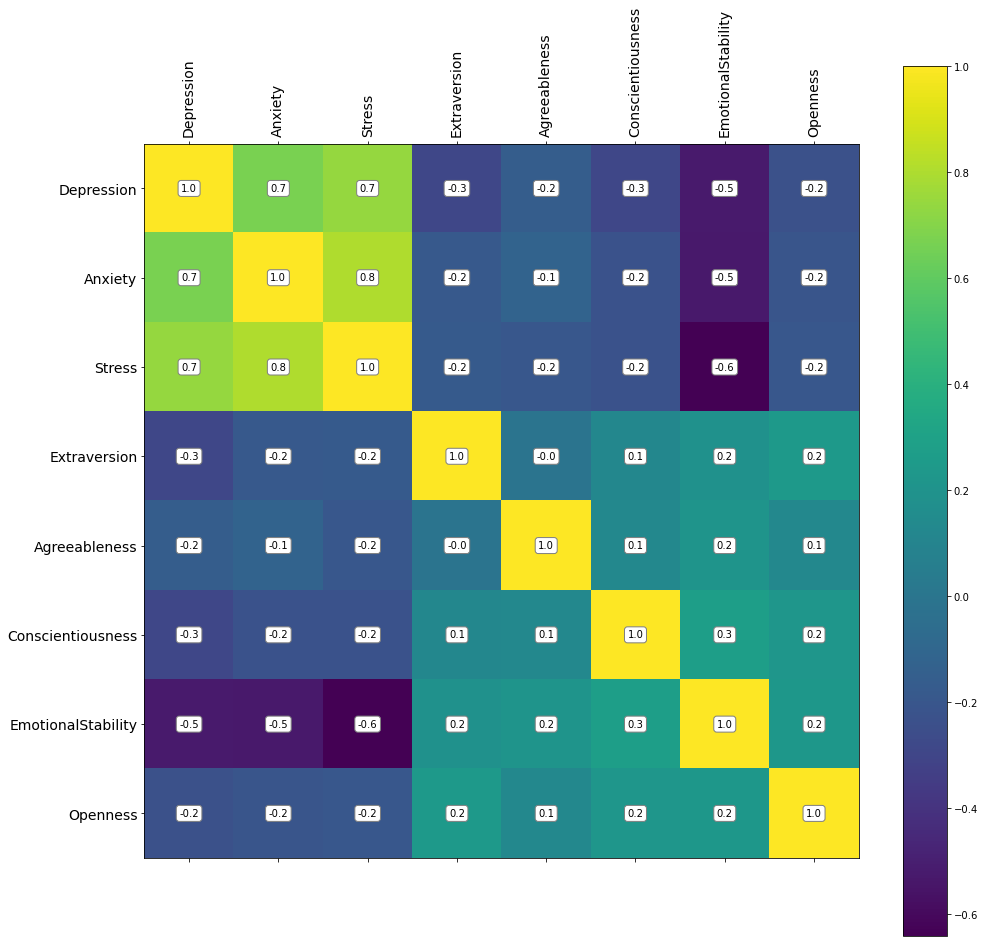

In [30]:
character = pd.concat([dass, personalities], axis=1)
plot_correlation(character, cmap='viridis')

In [31]:
def clasVar(df):
    conditions = [
    (df['Depression'] >= 14) ,
    (df['Anxiety'] >= 10)  ,
    (df['Stress'] >= 19), 
    ((df['Depression'] < 14)  & (df['Anxiety'] < 10) & (df['Stress'] < 19)),
    ]
    values = ['Depressed','axious', 'Stressed', 'Normal']
    df['diagnosis Category'] = np.select(conditions, values)
    return df

In [32]:
dfNew = clasVar(df)
dfNew.head(10)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Anxiety,Anxiety_cat,Stress,Stress_cat,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness,diagnosis Category
0,4,28,3890,4,25,2122,2,16,1944,4,...,34,4,40,4,0.5,4.5,4.5,0.5,6.5,Depressed
1,4,2,8118,1,36,2890,2,35,4777,3,...,17,3,27,3,4.5,4.5,2.0,0.5,3.5,Depressed
2,3,7,5784,1,33,4373,4,41,3242,1,...,12,2,17,1,1.5,3.5,2.0,4.0,5.0,Depressed
3,2,23,5081,3,11,6837,2,37,5521,1,...,17,3,16,1,2.0,6.0,6.5,4.5,6.0,Depressed
4,2,36,3215,2,13,7731,3,5,4156,4,...,40,4,29,3,2.0,3.5,2.0,2.0,4.5,Depressed
5,1,18,6116,1,28,3193,2,2,12542,1,...,6,0,12,0,1.0,6.5,5.5,6.0,3.5,Normal
6,1,20,4325,1,34,4009,2,38,3604,3,...,19,3,14,0,3.5,4.0,5.0,3.5,2.5,Depressed
7,1,34,4796,1,9,2618,1,39,5823,1,...,4,0,6,0,6.0,3.5,4.0,3.5,4.0,Normal
8,4,4,3470,4,14,2139,3,1,11043,4,...,39,4,33,3,0.5,4.5,2.5,0.5,4.0,Depressed
9,3,38,5187,2,28,2600,4,9,2015,1,...,28,4,34,4,0.5,0.5,5.0,0.5,2.5,Depressed


In [33]:
dfNew = dfNew.loc[:,['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness', 'diagnosis Category']]
dfNew

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness,diagnosis Category
0,0.5,4.5,4.5,0.5,6.5,Depressed
1,4.5,4.5,2.0,0.5,3.5,Depressed
2,1.5,3.5,2.0,4.0,5.0,Depressed
3,2.0,6.0,6.5,4.5,6.0,Depressed
4,2.0,3.5,2.0,2.0,4.5,Depressed
...,...,...,...,...,...,...
39770,2.0,5.0,3.5,2.5,3.5,Depressed
39771,2.5,3.0,2.5,2.0,3.5,Depressed
39772,5.0,3.5,6.5,3.5,4.5,Normal
39773,1.5,2.0,3.5,1.5,3.0,Depressed


(array([27133.,     0.,     0.,  7833.,     0.,     0.,  4287.,     0.,
            0.,   522.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

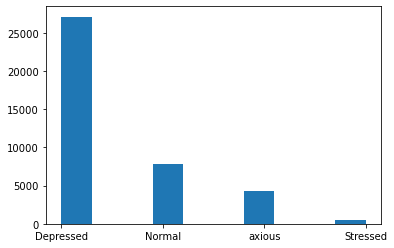

In [34]:
plt.hist(dfNew['diagnosis Category'])

In [35]:
dfNew.describe()

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
count,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.967278,4.040377,3.730660,2.738290,4.101634
std,1.555143,1.229776,1.491769,1.527743,1.335035
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,3.500000,2.500000,1.500000,3.500000
50%,3.000000,4.000000,3.500000,2.500000,4.000000
75%,4.000000,5.000000,5.000000,3.500000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000


In [36]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

In [37]:
y = dfNew['diagnosis Category']
counter = Counter(y)
print(counter)

Counter({'Depressed': 27133, 'Normal': 7833, 'axious': 4287, 'Stressed': 522})


In [38]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[5])
dfNew_res, y_res = sm.fit_resample(dfNew, y)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Resampled dataset samples per class Counter({'Depressed': 27133, 'Normal': 27133, 'axious': 27133, 'Stressed': 27133})


(array([27133.,     0.,     0., 27133.,     0.,     0., 27133.,     0.,
            0., 27133.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

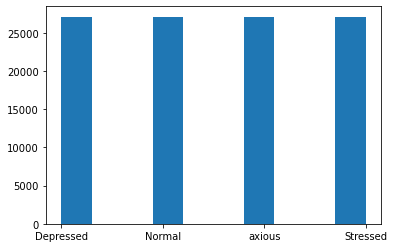

In [39]:
plt.hist(dfNew_res['diagnosis Category'])